In [83]:
#Importando as bibliotecas necessárias para a análise de dados e visualização.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
#definindo o caminho do arquivo CSV e lendo os dados usando a biblioteca pandas.
Dados = pd.read_csv('COLETA_PRBS_MG_ATUAL_60k.csv')

In [85]:
#Declarando as variáveis y, u e t, que correspondem aos dados de Tensão, Sinal PWM e tempo, respectivamente.
y = Dados["y"].values.astype(float)
u = Dados["u_volts"].values.astype(float)
t = Dados["tempo"].values.astype(float)
#Nesta parte ele pega os valores e limita o mesmo em uma lista com 1000 elementos.
N = 1000

u = u[0:N] #tensão de entrada no motor
y = y[0:N] #tensão de saída do motor/gerador.
t = t[0:N]
#Podemos verificar facilmente a quantidade elementos de uma lista com a função len().
#exemplo: len(u) ou len(y) ou len(t)
media = np.mean(u) 
print("Média aritmética:", media)


Média aritmética: 10.994117647058822


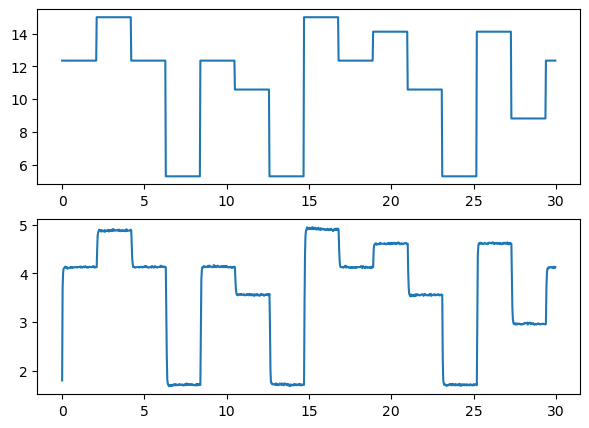

In [86]:
#Neste primeiro passo ele define o tamanho da figura/gráfico.
plt.figure(figsize=(7,5))
#Neste segundo passo ele cria dois gráficos, um em cima do outro, usando a função subplot. O primeiro gráfico (211) é para o sinal de entrada u, e o segundo gráfico (212) é para o sinal de saída y(sinal PWM).
plt.subplot(211)
plt.plot(t,u)
#Neste terceiro passo ele plota o gráfico do sinal de saída y em função do tempo t, usando a função plot, 212 para indicar que é o segundo gráfico da figura.
plt.subplot(212)
plt.plot(t,y)

$$y(t) = ay(t-1) + bu(t-1)$$

- Seja a forma matricial:  $$A\theta=y$$

- Definiremos a matriz A como sendo: 
$$A =
\begin{bmatrix}
y(t-1) & u(t-1)
\end{bmatrix}_{N \times 2}$$


In [87]:
ti = np.arange(1,N)
A = np.zeros((len(ti),2))
A[:,0] = y[ti-1]
A[:,1] = u[ti-1]
y = y[ti]


$$A\theta = y$$
$$A^{T}A\theta = A^{T}y$$
$$(A^{T}A)^{-1}A^{T}A\theta = (A^{T}A)^{-1}A^{T}y$$
$$I\theta = (A^{T}A)^{-1}A^{T}y$$
$$\theta = (A^{T}A)^{-1}A^{T}y$$

- Aplicando a solução de mínimos quadrados em theta, teremos:

In [88]:

theta = np.linalg.inv(A.T@A)@A.T@y
theta

array([0.45611245, 0.18005019])

In [89]:
#Multiplicando a matriz A pelo vetor theta para obter a saída estimada yh.
yh = A@theta

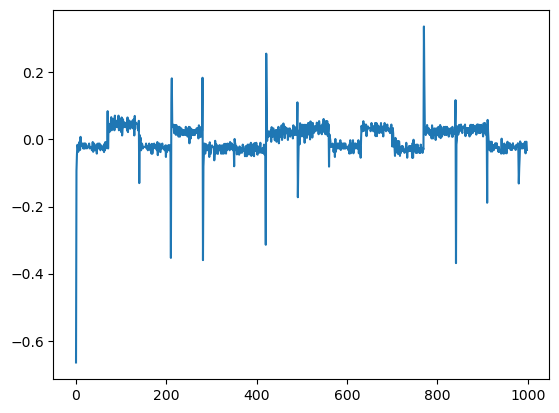

In [90]:
#Calculando o erro entre a saída estimada yh e a saída real y, e plotando o erro.
e = yh - y
plt.plot(e)

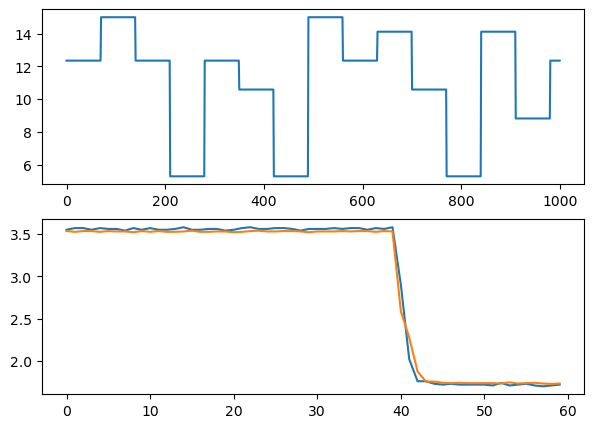

In [91]:
#Plotando o sinal de entrada u, a saída real y e a saída estimada yh para comparação.
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(u)
plt.subplot(212)
plt.plot(y[380:440])
plt.plot(yh[380:440])